**Position file_141_123_91**

In [1]:
from Bio import SeqIO
import pandas as pd

# Define input FASTA files
fasta_type_A = "typeA_aligned.fasta"  
fasta_type_B = "typeB_aligned.fasta"  

# Define output CSV file
output_csv = "selected_kl_divergence_positions_141_123_91.csv"

# Define selected positions 
selected_positions = [141 - 1, 123 - 1, 91 - 1]

# Function to extract residues at selected positions
def extract_features(fasta_file, label):
    data = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq_id = record.id
        sequence = str(record.seq)
        
        # Extract residues at selected positions
        residues = [sequence[pos] for pos in selected_positions]
        
        # Append data (ID, Residues, Label)
        data.append([seq_id] + residues + [label])
    
    return data

# Process both Type A and Type B sequences
data_A = extract_features(fasta_type_A, label=1)  # Type A = 1
data_B = extract_features(fasta_type_B, label=0)  # Type B = 0

# Combine both datasets
all_data = data_A + data_B

# Create DataFrame
columns = ["ID"] + [f"pos_{pos+1}" for pos in selected_positions] + ["label"]
df = pd.DataFrame(all_data, columns=columns)

# Save to CSV
df.to_csv(output_csv, index=False)

print(f"CSV file saved as: {output_csv}")


CSV file saved as: selected_kl_divergence_positions_141_123_91.csv


**Position file_141**

In [3]:
from Bio import SeqIO
import pandas as pd

# Define input FASTA files
fasta_type_A = "typeA_aligned.fasta"  
fasta_type_B = "typeB_aligned.fasta"  

# Define output CSV file
output_csv = "selected_kl_divergence_positions_141.csv"

# Define selected positions 
selected_positions = [141 - 1]

# Function to extract residues at selected positions
def extract_features(fasta_file, label):
    data = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq_id = record.id
        sequence = str(record.seq)
        
        # Extract residues at selected positions
        residues = [sequence[pos] for pos in selected_positions]
        
        # Append data (ID, Residues, Label)
        data.append([seq_id] + residues + [label])
    
    return data

# Process both Type A and Type B sequences
data_A = extract_features(fasta_type_A, label=1)  # Type A = 1
data_B = extract_features(fasta_type_B, label=0)  # Type B = 0

# Combine both datasets
all_data = data_A + data_B

# Create DataFrame
columns = ["ID"] + [f"pos_{pos+1}" for pos in selected_positions] + ["label"]
df = pd.DataFrame(all_data, columns=columns)

# Save to CSV
df.to_csv(output_csv, index=False)

print(f"CSV file saved as: {output_csv}")


CSV file saved as: selected_kl_divergence_positions_141.csv


**Position file_137_192_196**

In [1]:
from Bio import SeqIO
import pandas as pd

# Define input FASTA files
fasta_type_A = "typeA_aligned.fasta"  
fasta_type_B = "typeB_aligned.fasta"  

# Define output CSV file
output_csv = "selected_kl_divergence_positions_192_196_137.csv"

# Define selected positions 
selected_positions = [192 - 1, 196 - 1, 137 - 1]

# Function to extract residues at selected positions
def extract_features(fasta_file, label):
    data = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq_id = record.id
        sequence = str(record.seq)
        
        # Extract residues at selected positions
        residues = [sequence[pos] for pos in selected_positions]
        
        # Append data (ID, Residues, Label)
        data.append([seq_id] + residues + [label])
    
    return data

# Process both Type A and Type B sequences
data_A = extract_features(fasta_type_A, label=1)  # Type A = 1
data_B = extract_features(fasta_type_B, label=0)  # Type B = 0

# Combine both datasets
all_data = data_A + data_B

# Create DataFrame
columns = ["ID"] + [f"pos_{pos+1}" for pos in selected_positions] + ["label"]
df = pd.DataFrame(all_data, columns=columns)

# Save to CSV
df.to_csv(output_csv, index=False)

print(f"CSV file saved as: {output_csv}")


CSV file saved as: selected_kl_divergence_positions_192_196_137.csv


**Position file_137**

In [4]:
from Bio import SeqIO
import pandas as pd

# Define input FASTA files
fasta_type_A = "typeA_aligned.fasta"  
fasta_type_B = "typeB_aligned.fasta"  

# Define output CSV file
output_csv = "selected_kl_divergence_positions_137.csv"

# Define selected positions (0-based index in Python, so subtract 1)
selected_positions = [137 - 1]

# Function to extract residues at selected positions
def extract_features(fasta_file, label):
    data = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq_id = record.id
        sequence = str(record.seq)
        
        # Extract residues at selected positions
        residues = [sequence[pos] for pos in selected_positions]
        
        # Append data (ID, Residues, Label)
        data.append([seq_id] + residues + [label])
    
    return data

# Process both Type A and Type B sequences
data_A = extract_features(fasta_type_A, label=1)  # Type A = 1
data_B = extract_features(fasta_type_B, label=0)  # Type B = 0

# Combine both datasets
all_data = data_A + data_B

# Create DataFrame
columns = ["ID"] + [f"pos_{pos+1}" for pos in selected_positions] + ["label"]
df = pd.DataFrame(all_data, columns=columns)

# Save to CSV
df.to_csv(output_csv, index=False)

print(f"CSV file saved as: {output_csv}")


CSV file saved as: selected_kl_divergence_positions_137.csv


**Classifier Model**

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import joblib

df = pd.read_csv("selected_kl_divergence_positions_192_196_143.csv")

# Extract features and labels
selected_positions = [col for col in df.columns if col.startswith("pos_")]
X = df[selected_positions].astype(str)
y = df["label"]

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)
joblib.dump(encoder, "one_hot_encoder.pkl")

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Stratified 5-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
confusion_matrices = []

for model_name, model in models.items():
    fold_acc = []
    fold_auc = []
    typeA_metrics = []
    typeB_metrics = []

    print(f"\n🧩 Training {model_name} with 5-fold cross-validation...")

    for fold, (train_idx, test_idx) in enumerate(kf.split(X_encoded, y), 1):
        X_train, X_test = X_encoded[train_idx], X_encoded[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        fold_acc.append(acc)
        fold_auc.append(auc)

        # Store per-class metrics
        typeA_metrics.append(report["1"])
        typeB_metrics.append(report["0"])

        # Save confusion matrix
        confusion_matrices.append({
            "Model": model_name,
            "Fold": fold,
            "Actual Type B - Predicted Type B": conf_matrix[0, 0],
            "Actual Type B - Predicted Type A": conf_matrix[0, 1],
            "Actual Type A - Predicted Type B": conf_matrix[1, 0],
            "Actual Type A - Predicted Type A": conf_matrix[1, 1]
        })

    # Average across folds
    avg_typeA = pd.DataFrame(typeA_metrics).mean()
    avg_typeB = pd.DataFrame(typeB_metrics).mean()

    results.append({
        "Model": model_name,
        "Mean Accuracy": np.mean(fold_acc),
        "Mean AUC": np.mean(fold_auc),
        "Precision (Type A)": avg_typeA["precision"],
        "Recall (Type A)": avg_typeA["recall"],
        "F1-Score (Type A)": avg_typeA["f1-score"],
        "Precision (Type B)": avg_typeB["precision"],
        "Recall (Type B)": avg_typeB["recall"],
        "F1-Score (Type B)": avg_typeB["f1-score"]
    })

    # Save trained model from last fold
    model_filename = f"{model_name.replace(' ', '_').lower()}_cv_classifier.pkl"
    joblib.dump(model, model_filename)

# Save results
pd.DataFrame(results).to_csv("classification_results_5fold.csv", index=False)
pd.DataFrame(confusion_matrices).to_csv("confusion_matrices_5fold.csv", index=False)

print("\n✅ 5-fold CV results saved to 'classification_results_5fold.csv'")
print("✅ Confusion matrices saved to 'confusion_matrices_5fold.csv'")


✅ Classification results with AUC saved to classification_results.csv
✅ Confusion matrices saved to confusion_matrices_combined.csv


/Users/cindytsai/myenv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:26:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**visualization of one-hot encoding**

/Users/cindytsai/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cindytsai/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cindytsai/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


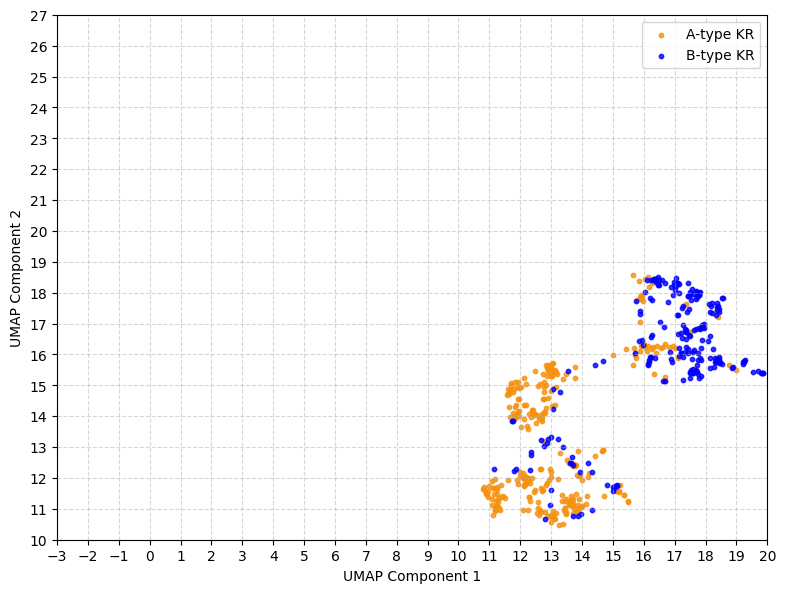

/Users/cindytsai/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


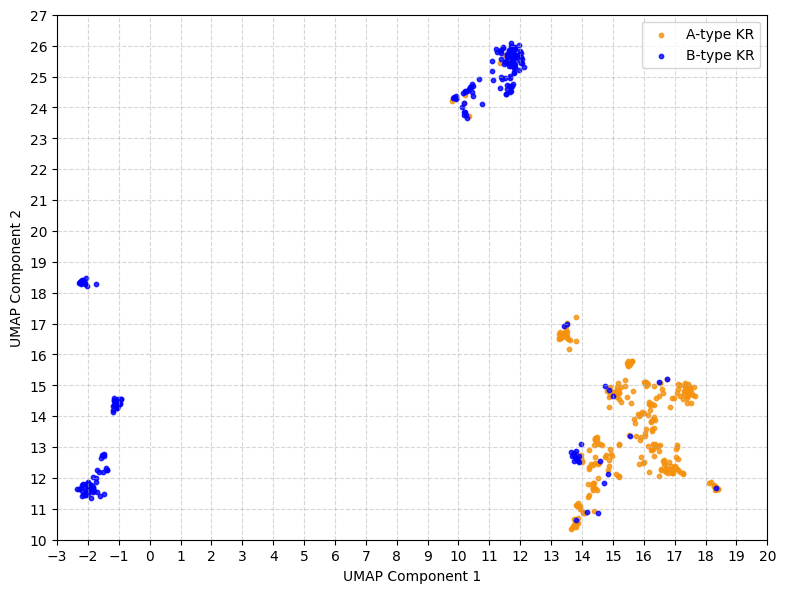

array([[15.852864 , 12.461128 ],
       [14.424472 , 13.25502  ],
       [13.725124 , 10.4419565],
       ...,
       [-1.5361812, 12.731017 ],
       [10.378916 , 24.671467 ],
       [11.68938  , 26.08466  ]], dtype=float32)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import umap

def run_umap_and_plot(file, label_col="label", color_a="#f5910c", color_b="blue",
                      global_xlim=None, global_ylim=None, save_name=None):

    df = pd.read_csv(file)

    # Extract selected positions
    selected_positions = [col for col in df.columns if col.startswith("pos_")]
    X = df[selected_positions].astype(str)
    y = df[label_col]  # A-type KR (1), B-type KR (0)

    # One-hot encoding
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    X_encoded = encoder.fit_transform(X)

    # --- UMAP ---
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_encoded)

    # --- Plot ---
    plt.figure(figsize=(8, 6))
    plt.scatter(X_umap[y == 1, 0], X_umap[y == 1, 1],
                color=color_a, label="A-type KR", alpha=0.8, s=10)
    plt.scatter(X_umap[y == 0, 0], X_umap[y == 0, 1],
                color=color_b, label="B-type KR", alpha=0.8, s=10)

    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    plt.legend(loc="upper right")
    plt.grid(True, linestyle="--", alpha=0.5)

    # Equal aspect ratio and unified scale
    plt.gca().set_aspect('equal', adjustable='box')

    # Use global limits if provided, otherwise compute from data
    if global_xlim is not None and global_ylim is not None:
        plt.xlim(global_xlim)
        plt.ylim(global_ylim)
        plt.xticks(np.arange(global_xlim[0], global_xlim[1] + 1, 1))
        plt.yticks(np.arange(global_ylim[0], global_ylim[1] + 1, 1))
    else:
        x_min, x_max = np.floor(X_umap[:,0].min()), np.ceil(X_umap[:,0].max())
        y_min, y_max = np.floor(X_umap[:,1].min()), np.ceil(X_umap[:,1].max())
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(np.arange(x_min, x_max + 1, 1))
        plt.yticks(np.arange(y_min, y_max + 1, 1))

    plt.tight_layout()

    if save_name:
        plt.savefig(save_name, dpi=1000)
    plt.show()

    return X_umap


# --- Run both datasets ---
file1 = "selected_kl_divergence_positions_192_196_137.csv"
file2 = "selected_kl_divergence_positions_141_123_91.csv"

# Compute embeddings first to find shared scale
def get_bounds(X_umap):
    return [np.floor(X_umap[:,0].min()), np.ceil(X_umap[:,0].max())], \
           [np.floor(X_umap[:,1].min()), np.ceil(X_umap[:,1].max())]

# Run both first to compute bounds
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

def encode_umap(df):
    X = df[[col for col in df.columns if col.startswith("pos_")]].astype(str)
    y = df["label"]
    X_encoded = enc.fit_transform(X)
    reducer = umap.UMAP(n_components=2, random_state=42)
    return reducer.fit_transform(X_encoded)

umap1 = encode_umap(df1)
umap2 = encode_umap(df2)

xlim = [min(np.floor(umap1[:,0].min()), np.floor(umap2[:,0].min())),
        max(np.ceil(umap1[:,0].max()), np.ceil(umap2[:,0].max()))]
ylim = [min(np.floor(umap1[:,1].min()), np.floor(umap2[:,1].min())),
        max(np.ceil(umap1[:,1].max()), np.ceil(umap2[:,1].max()))]

# --- Final consistent plots ---
run_umap_and_plot(file1, global_xlim=xlim, global_ylim=ylim, save_name="umap_192_196_137_equal.png")
run_umap_and_plot(file2, global_xlim=xlim, global_ylim=ylim, save_name="umap_141_123_91_equal.png")
